<a href="https://colab.research.google.com/github/joeldcosta/Deep-Nudle/blob/main/Deep_Nudle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
████████▄     ▄████████    ▄████████    ▄███████▄      ███▄▄▄▄   ███    █▄  ████████▄   ▄█          ▄████████ 
███   ▀███   ███    ███   ███    ███   ███    ███      ███▀▀▀██▄ ███    ███ ███   ▀███ ███         ███    ███ 
███    ███   ███    █▀    ███    █▀    ███    ███      ███   ███ ███    ███ ███    ███ ███         ███    █▀  
███    ███  ▄███▄▄▄      ▄███▄▄▄       ███    ███      ███   ███ ███    ███ ███    ███ ███        ▄███▄▄▄     
███    ███ ▀▀███▀▀▀     ▀▀███▀▀▀     ▀█████████▀       ███   ███ ███    ███ ███    ███ ███       ▀▀███▀▀▀     
███    ███   ███    █▄    ███    █▄    ███             ███   ███ ███    ███ ███    ███ ███         ███    █▄  
███   ▄███   ███    ███   ███    ███   ███             ███   ███ ███    ███ ███   ▄███ ███▌    ▄   ███    ███ 
████████▀    ██████████   ██████████  ▄████▀            ▀█   █▀  ████████▀  ████████▀  █████▄▄██   ██████████ 
                                                                                       ▀                      
```

In [34]:
#@title Rules to Follow
%%html 
<style>
table { border-collapse:collapse; }
tr { border-bottom: 1px solid #000; }
td {font-size:30px;}
</style>
<table>
    <tr>
    <td><img src="https://app.deepnude.cc/templates/default/assets/1.png" width="60%"></td>
    <td>Zoom out to show majority of body, facing straight. Use a high resolution photo that has been resized to at least 1024px width.</td>
    </tr>
    <tr>
    <td><img src="https://app.deepnude.cc/templates/default/assets/3.png" width="40%"></td>
    <td>Good contrast between skin and clothing colors. Hair not blocking too much of body.</td>
    </tr>
    <tr>
    <td><img src="https://app.deepnude.cc/templates/default/assets/2.png" width="40%"></td>
    <td>Avoid baggy clothing and coats. Single piece dresses are OK. Tighter clothing have better results.</td>
    </tr>
</table>

,"Zoom out to show majority of body, facing straight. Use a high resolution photo that has been resized to at least 1024px width."
,Good contrast between skin and clothing colors. Hair not blocking too much of body.
,Avoid baggy clothing and coats. Single piece dresses are OK. Tighter clothing have better results.


# Run 1. DeepNudle With Simple Deepfake 
```
#Original Repository (Google Repo).
!git clone "https://github.com/gorpo/SIMPLE-Deepfake-Google-Colab"
```

In [ ]:
#@title Clone Repository (My Repo incase the above causing error)
!git clone "https://github.com/joeldcosta/SIMPLE-Deepfake-Google-Colab"

# Run 2. Downloading libraries from http://archive.org/download/deepfake


In [ ]:
#@title Downloading Library in checkpoint folder. 
!wget -c -P /content/SIMPLE-Deepfake-Google-Colab/checkpoint http://archive.org/download/deepfake/cm.lib
!wget -c -P /content/SIMPLE-Deepfake-Google-Colab/checkpoint http://archive.org/download/deepfake/mm.lib
!wget -c -P /content/SIMPLE-Deepfake-Google-Colab/checkpoint http://archive.org/download/deepfake/mn.lib

In [ ]:
#@title ## - **This will take some time so get a coffee and buy me one.**
%%html
<a href="https://www.buymeacoffee.com/python4fun" target="_blank"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=🍺&slug=python4fun&button_colour=FFDD00&font_colour=000000&font_family=Cookie&outline_colour=000000&coffee_colour=ffffff" width=20%></a></script> </div><script>window.open("https://g.co/payinvite/s8jt59");</script>


# Run 3. Upload Image from Web [Open cell if hidden]

In [54]:
#@title Please Enter Image URL
import requests
#url = input("Enter Image URL Here:- ") 
url = "https://m.media-amazon.com/images/I/61KDPdHj6QL._UX569_.jpg" #@param {type:"string"}
r = requests.get(url)
with open('/content/SIMPLE-Deepfake-Google-Colab/images/file.jpg','wb') as f:
     f.write(r.content)

# OR (if above done then skip)
#Upload Image From Your Computer Locally

In [ ]:
#@title Please Choose Your Image from you Local Computer
from google.colab import files
import shutil
uploaded = files.upload()
for fm in uploaded.keys():
     print("User uploaded file '{name}' with length {length} bytes".format(name=fm, length=len(uploaded[fm])))
     shutil.move(fm, '/content/SIMPLE-Deepfake-Google-Colab/images/file.jpg')




---



# Run 4. View Original Image Here 

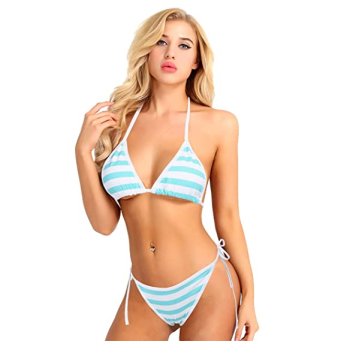

In [55]:
#@title View Original
from google.colab.patches import cv2_imshow
import cv2
images = cv2.imread('/content/SIMPLE-Deepfake-Google-Colab/images/file.jpg')

scale = 60
width = int(images.shape[1] * scale / 100)
height = int(images.shape[0] * scale / 100)
dimension = (width, height)
redimension = cv2.resize(images, dimension, interpolation = cv2.INTER_AREA)
cv2_imshow(redimension)

# Run 5. Generate Deep Nudle from Deepfake.py

In [ ]:
#@title Generating Deep Nudle
import os   
output = os.popen('python /content/SIMPLE-Deepfake-Google-Colab/deepfake.py').read()
print(output)

#🟢 Run 6. View Image as BLUR for Safety 

Gaussian Blur


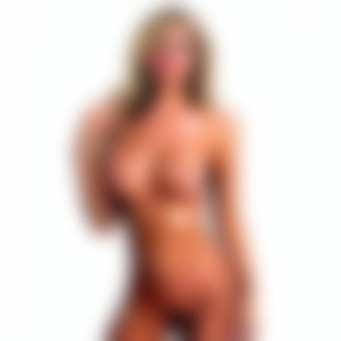

In [57]:
#@title Blur Image Setting
from PIL import Image, ImageFilter

blr = "Gaussian Blur" #@param ["Box Blur", "Gaussian Blur"]

if "Box Blur" in blr:
  blr_B = True 
  blr_G = False
if "Gaussian Blur" in blr:
  blr_G = True 
  blr_B = False

print(blr)
#blr_B = False #@param {type:"boolean"}
#blr_G = True #@param {type:"boolean"}

#Open existing image
OriImage = Image.open('/content/SIMPLE-Deepfake-Google-Colab/images/renderizada.jpg')

# Options ##########################################
blur_ = 15#@param {type:"number"}
if blr_B:
  #Applying BoxBlur filter
  blr_B  = OriImage.filter(ImageFilter.BoxBlur(blur_))
  #Save image
  blr_B.save('/content/SIMPLE-Deepfake-Google-Colab/images/blurImage.jpg')
if blr_G:
  #Applying GaussianBlur filter
  blr_G = OriImage.filter(ImageFilter.GaussianBlur(blur_))
  #Save image
  blr_G.save('/content/SIMPLE-Deepfake-Google-Colab/images/blurImage.jpg')

#####################################################


from google.colab.patches import cv2_imshow
import cv2
images = cv2.imread('/content/SIMPLE-Deepfake-Google-Colab/images/blurImage.jpg')

scale = 60
width = int(images.shape[1] * scale / 100)
height = int(images.shape[0] * scale / 100)
dimension = (width, height)
redimension = cv2.resize(images, dimension, interpolation = cv2.INTER_AREA)
cv2_imshow(redimension)

#🔞 Run 7. View Full Nudle Image 

In [ ]:
#@title View Deep Nudle [Uncensored]
from google.colab.patches import cv2_imshow
import cv2

images = cv2.imread('/content/SIMPLE-Deepfake-Google-Colab/images/renderizada.jpg')

scale = 60
width = int(images.shape[1] * scale / 100)
height = int(images.shape[0] * scale / 100)
dimension = (width, height)
redimension = cv2.resize(images, dimension, interpolation = cv2.INTER_AREA)
cv2_imshow(redimension)

# Run 8. Download Nudle Image

In [ ]:
#@title Download Image [Blur & 18+]
from google.colab import files as FILE

FILE.download('/content/SIMPLE-Deepfake-Google-Colab/images/renderizada.jpg')
FILE.download('/content/SIMPLE-Deepfake-Google-Colab/images/blurImage.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Find Me or Check out my Youtube & Blog
%%html
<a href="http://twitter.com/JoelDcosta10" target="_blank"><img src="https://purepng.com/public/uploads/large/purepng.com-twitter-icon-ios-7symbolsiconsapple-iosiosios-7-iconsios-7-721522596687v78wl.png" width=5%></a>
<a href="https://youtube.com/c/python4Fun" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/YouTube_social_white_squircle_%282017%29.svg/1200px-YouTube_social_white_squircle_%282017%29.svg.png" width=5%></a>
<a href="https://pysnakeblog.blogspot.com" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Blogger.svg/1200px-Blogger.svg.png" width=5%></a>